In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import i0, i1, k0, k1

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Abordaremos el problema del Phantom Dark Matter para un disco descrito por el perfil de Miyamoto-Nagai. 
Partiendo de la ecuación de Poisson, calcularemos la densidad de phantom dark matter para luego graficarla respecto al radio. Veremos qué sucede.

Primero construiremos las funciones de las derivadas primera y segunda del potencial gravitacional newtoniano para el disco de Miyamoto-Nagai

In [2]:
## Definimos las constantes

G = 430007.1

a_0 = 4679.4 ## [kpc/Gyr^2]  

In [3]:
## Definimos las funciones de las derivadas primera y segunda del potencial en el perfil de Hernquist


def PrimeraPotencialR(M, b, c, R, z):
    x = R*R + c * np.sqrt(b*b + z*z)
    PrimeraPotencialR = -G * M * R / np.sqrt(x * x * x)
    return PrimeraPotencialR

def SegundaPotencialR(M, b, c, R, z):
    x = R*R + c * np.sqrt(b*b + z*z)
    SegundaPotencialR = G * M * (2.0 * R*R - c -np.sqrt(b*b + z*z))/np.sqrt(x*x*x*x*x)
    return SegundaPotencialR

def PrimeraPotencialZ(M, b, c, R, z):
    x = R*R + c * np.sqrt(b*b + z*z)
    PrimeraPotencialZ = -G*M*z/(np.sqrt(x*x*x) * np.sqrt(b*b + z*z))
    return PrimeraPotencialZ

def SegundaPotencialZ(M, b, c, R, z):
    x = R*R + c * np.sqrt(b*b + z*z)
    x2 = z*z / (b*b + z*z)
    x3 = 3.0*z*z/(2.0 * np.sqrt(b*b + z*z) * x)
    SegundaPotencialZ = -G*M/(2.0 * np.sqrt(x*x*x) * np.sqrt(b*b + z*z)) * (1 - x2 - x3)
    return SegundaPotencialZ

In [4]:
## Definimos la densidad de phantom dark matter para las funciones de interpolación de mu,

## R.A.R.

def mu_RAR(M, b, c, R, z):
    a = np.sqrt(PrimeraPotencialR(M, b, c, R, z)*PrimeraPotencialR(M, b, c, R, z) + 
                PrimeraPotencialZ(M, b, c, R, z)*PrimeraPotencialZ(M, b, c, R, z) )
    mu_RAR = 1.0 / (1.0 - np.exp( -np.sqrt(a / a_0) ) )
    return mu_RAR

def PDM_RAR_ComponenteR(M, b, c, R, z):
    x = R*R + c + np.sqrt(b*b + z*z)
    y = b*b + z*z
    a_R = PrimeraPotencialR(M, b, c, R, z)
    a_Z = PrimeraPotencialZ(M, b, c, R, z)
    a = np.sqrt(a_R*a_R + a_Z*a_Z)
    factor_comun = -mu_RAR(M, b, c, R, z)*mu_RAR(M, b, c, R, z) * G * M * np.exp(-np.sqrt(a/a_0)) / (2.0 * np.sqrt(a_0 * a) * np.sqrt(x*x*x))
    PDM_RAR_ComponenteR = factor_comun * (2.0 * R * R - c - np.sqrt(y)) * a_R / x 
    return PDM_RAR_ComponenteR

def PDM_RAR_ComponenteZ(M, b, c, R, z):
    x = R*R + c + np.sqrt(b*b + z*z)
    y = b*b + z*z
    a_R = PrimeraPotencialR(M, b, c, R, z)
    a_Z = PrimeraPotencialZ(M, b, c, R, z)
    a = np.sqrt(a_R*a_R + a_Z*a_Z)
    factor_comun = -mu_RAR(M, b, c, R, z)*mu_RAR(M, b, c, R, z) * G * M * np.exp(-np.sqrt(a/a_0)) / (2.0 * np.sqrt(a_0 * a) * np.sqrt(x*x*x))
    PDM_RAR_ComponenteZ = factor_comun * (1.0 / (2.0 * np.sqrt(y))) * (1.0 - z*z / y - 3.0*z*z / (2.0 * np.sqrt(y) * x))
    return PDM_RAR_ComponenteZ

def PDM_RAR(M, b, c, R, z):
    componenteR = PDM_RAR_ComponenteR(M, b, c, R, z)
    componenteZ = PDM_RAR_ComponenteZ(M, b, c, R, z)
    PDM_RAR = componenteR + componenteZ
    return PDM_RAR


## Simple

def mu_Simple(M, b, c, R, z):
    a = np.sqrt(PrimeraPotencialR(M, b, c, R, z)*PrimeraPotencialR(M, b, c, R, z) + 
                PrimeraPotencialZ(M, b, c, R, z)*PrimeraPotencialZ(M, b, c, R, z) )
    mu_Simple = 0.5 * (1 + np.sqrt(1.0 + 4.0*a_0/a))
    return mu_Simple

def PDM_Simple_ComponenteR(M, b, c, R, z):
    x = R*R + c + np.sqrt(b*b + z*z)
    y = b*b + z*z
    a_R = PrimeraPotencialR(M, b, c, R, z)
    a_Z = PrimeraPotencialZ(M, b, c, R, z)
    a = np.sqrt(a_R*a_R + a_Z*a_Z)
    factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
    PDM_Simple_ComponenteR = factor_comun * (-(2.0*R*R - c + np.sqrt(y))) * a_R / x
    return PDM_Simple_ComponenteR

def PDM_Simple_ComponenteZ(M, b, c, R, z):
    x = R*R + c + np.sqrt(b*b + z*z)
    y = b*b + z*z
    a_R = PrimeraPotencialR(M, b, c, R, z)
    a_Z = PrimeraPotencialZ(M, b, c, R, z)
    a = np.sqrt(a_R*a_R + a_Z*a_Z)
    factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
    PDM_Simple_ComponenteZ = factor_comun * (1.0/(2.0 * np.sqrt(y))) * (1.0 - z*z / y - 3.0*z*z / (2.0 * np.sqrt(y) * x)) * a_Z
    return PDM_Simple_ComponenteZ

def PDM_Simple(M, b, c, R, z):
    componenteR = PDM_Simple_ComponenteR(M, b, c, R, z)
    componenteZ = PDM_Simple_ComponenteZ(M, b, c, R, z)
    PDM_Simple = componenteR + componenteZ 
    return PDM_Simple

    
## Standard

def mu_Standard(M, b, c, R, z):
    a = np.sqrt(PrimeraPotencialR(M, b, c, R, z)*PrimeraPotencialR(M, b, c, R, z) + 
                PrimeraPotencialZ(M, b, c, R, z)*PrimeraPotencialZ(M, b, c, R, z) )
    mu_Standard = np.sqrt(0.5 * (1.0 + np.sqrt(1.0 + 4.0*a_0/a)))
    return mu_Standard

def PDM_Standard_ComponenteR(M, b, c, R, z):
    x = R*R + c + np.sqrt(b*b + z*z)
    y = b*b + z*z
    a_R = PrimeraPotencialR(M, b, c, R, z)
    a_Z = PrimeraPotencialZ(M, b, c, R, z)
    a = np.sqrt(a_R*a_R + a_Z*a_Z)
    factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0/(a*a)) * np.sqrt(x*x*x))
    PDM_Standard_ComponenteR = factor_comun * (2.0 * R*R - b - np.sqrt(y) * a_R / x)
    return PDM_Standard_ComponenteR

def PDM_Standard_ComponenteZ(M, b, c, R, z):
    x = R*R + c + np.sqrt(b*b + z*z)
    y = b*b + z*z
    a_R = PrimeraPotencialR(M, b, c, R, z)
    a_Z = PrimeraPotencialZ(M, b, c, R, z)
    a = np.sqrt(a_R*a_R + a_Z*a_Z)
    factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0/(a*a)) * np.sqrt(x*x*x))
    PDM_Standard_ComponenteZ = factor_comun * (1.0/(2.0 * np.sqrt(y))) * (1.0 - z*z / y - 3.0*z*z / (2.0 * np.sqrt(y) * x)) * a_Z
    return PDM_Standard_ComponenteZ

def PDM_Standard(M, b, c, R, z):
    componenteR = PDM_Standard_ComponenteR(M, b, c, R, z)
    componenteZ = PDM_Standard_ComponenteZ(M, b, c, R, z)
    PDM_Standard = componenteR + componenteZ
    return PDM_Standard
    


In [5]:
PDM_Standard(1, 1, 1, 1, 1)

187665223.97217327

In [6]:
R = np.arange(0.0, 20.0, 0.5)
z = np.arange(0.0, 20.0, 0.5)

/tmp/ipykernel_7852/3035639710.py:8: RuntimeWarning: divide by zero encountered in divide
  mu_RAR = 1.0 / (1.0 - np.exp( -np.sqrt(a / a_0) ) )
/tmp/ipykernel_7852/3035639710.py:18: RuntimeWarning: invalid value encountered in multiply
  PDM_RAR_ComponenteR = factor_comun * (2.0 * R * R - c - np.sqrt(y)) * a_R / x
/tmp/ipykernel_7852/3035639710.py:52: RuntimeWarning: divide by zero encountered in divide
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:52: RuntimeWarning: invalid value encountered in multiply
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:78: RuntimeWarning: divide by zero encountered in divide
  mu_Standard = np.sqrt(0.5 * (1.0 + np.sqrt(1.0 + 4.0*a_0/a)))
/tmp/ipykernel_7852/3035639710.py:87: RuntimeWarning: invalid value encountered in multiply
  factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0

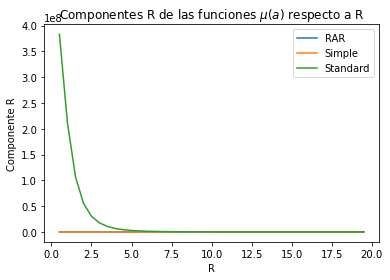

In [7]:
plt.plot(R, PDM_RAR_ComponenteR(1, 1, 1, R, z), label='RAR')
plt.plot(R, PDM_Simple_ComponenteR(1, 1, 1, R, z), label='Simple')
plt.plot(R, PDM_Standard_ComponenteR(1, 1, 1, R, z), label='Standard')
plt.xlabel('R')
plt.ylabel('Componente R')
plt.title('Componentes R de las funciones $\mu(a)$ respecto a R')
plt.legend()

/tmp/ipykernel_7852/3035639710.py:8: RuntimeWarning: divide by zero encountered in divide
  mu_RAR = 1.0 / (1.0 - np.exp( -np.sqrt(a / a_0) ) )
/tmp/ipykernel_7852/3035639710.py:18: RuntimeWarning: invalid value encountered in multiply
  PDM_RAR_ComponenteR = factor_comun * (2.0 * R * R - c - np.sqrt(y)) * a_R / x
/tmp/ipykernel_7852/3035639710.py:52: RuntimeWarning: divide by zero encountered in divide
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:52: RuntimeWarning: invalid value encountered in multiply
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))


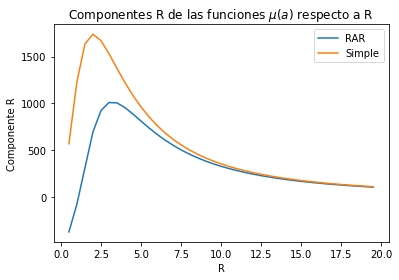

In [8]:
plt.plot(R, PDM_RAR_ComponenteR(1, 1, 1, R, z), label='RAR')
plt.plot(R, PDM_Simple_ComponenteR(1, 1, 1, R, z), label='Simple')
#plt.plot(R, PDM_Standard_ComponenteR(1, 1, 1, R, z), label='Standard')
plt.xlabel('R')
plt.ylabel('Componente R')
plt.title('Componentes R de las funciones $\mu(a)$ respecto a R')
plt.legend()

/tmp/ipykernel_7852/3035639710.py:78: RuntimeWarning: divide by zero encountered in divide
  mu_Standard = np.sqrt(0.5 * (1.0 + np.sqrt(1.0 + 4.0*a_0/a)))
/tmp/ipykernel_7852/3035639710.py:87: RuntimeWarning: invalid value encountered in multiply
  factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0/(a*a)) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:87: RuntimeWarning: divide by zero encountered in divide
  factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0/(a*a)) * np.sqrt(x*x*x))


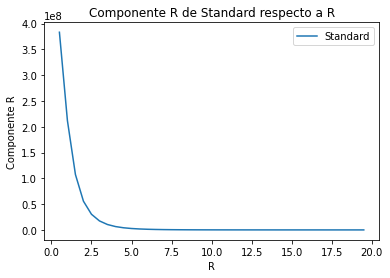

In [9]:
plt.plot(R, PDM_Standard_ComponenteR(1, 1, 1, R, z), label='Standard')
plt.xlabel('R')
plt.ylabel('Componente R')
plt.title('Componente R de Standard respecto a R')
plt.legend()

/tmp/ipykernel_7852/3035639710.py:8: RuntimeWarning: divide by zero encountered in divide
  mu_RAR = 1.0 / (1.0 - np.exp( -np.sqrt(a / a_0) ) )
/tmp/ipykernel_7852/3035639710.py:62: RuntimeWarning: divide by zero encountered in divide
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:62: RuntimeWarning: invalid value encountered in multiply
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:78: RuntimeWarning: divide by zero encountered in divide
  mu_Standard = np.sqrt(0.5 * (1.0 + np.sqrt(1.0 + 4.0*a_0/a)))
/tmp/ipykernel_7852/3035639710.py:97: RuntimeWarning: invalid value encountered in multiply
  factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0/(a*a)) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:97: RuntimeWarning: divide by zero encountered in divide
  factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b,

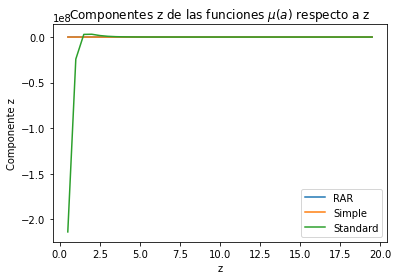

In [10]:
plt.plot(z, PDM_RAR_ComponenteZ(1, 1, 1, R, z), label='RAR')
plt.plot(z, PDM_Simple_ComponenteZ(1, 1, 1, R, z), label='Simple')
plt.plot(z, PDM_Standard_ComponenteZ(1, 1, 1, R, z), label='Standard')
plt.xlabel('z')
plt.ylabel('Componente z')
plt.title('Componentes z de las funciones $\mu(a)$ respecto a z')
plt.legend()

/tmp/ipykernel_7852/3035639710.py:8: RuntimeWarning: divide by zero encountered in divide
  mu_RAR = 1.0 / (1.0 - np.exp( -np.sqrt(a / a_0) ) )


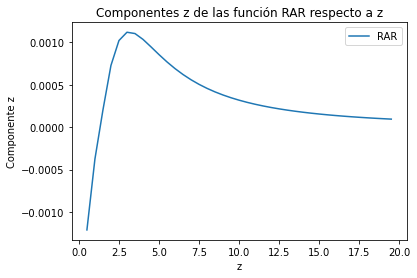

In [11]:
plt.plot(z, PDM_RAR_ComponenteZ(1, 1, 1, R, z), label='RAR')
#plt.plot(z, PDM_Simple_ComponenteZ(1, 1, 1, R, z), label='Simple')
#plt.plot(z, PDM_Standard_ComponenteZ(1, 1, 1, R, z), label='Standard')
plt.xlabel('z')
plt.ylabel('Componente z')
plt.title('Componentes z de las función RAR respecto a z')
plt.legend()

/tmp/ipykernel_7852/3035639710.py:62: RuntimeWarning: divide by zero encountered in divide
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:62: RuntimeWarning: invalid value encountered in multiply
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))


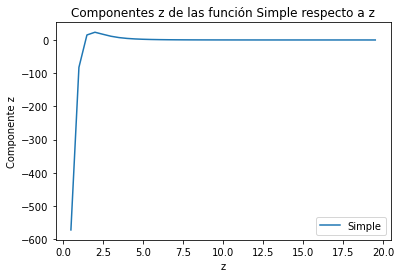

In [12]:
#plt.plot(z, PDM_RAR_ComponenteZ(1, 1, 1, R, z), label='RAR')
plt.plot(z, PDM_Simple_ComponenteZ(1, 1, 1, R, z), label='Simple')
#plt.plot(z, PDM_Standard_ComponenteZ(1, 1, 1, R, z), label='Standard')
plt.xlabel('z')
plt.ylabel('Componente z')
plt.title('Componentes z de las función Simple respecto a z')
plt.legend()

/tmp/ipykernel_7852/3035639710.py:78: RuntimeWarning: divide by zero encountered in divide
  mu_Standard = np.sqrt(0.5 * (1.0 + np.sqrt(1.0 + 4.0*a_0/a)))
/tmp/ipykernel_7852/3035639710.py:97: RuntimeWarning: invalid value encountered in multiply
  factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0/(a*a)) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:97: RuntimeWarning: divide by zero encountered in divide
  factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0/(a*a)) * np.sqrt(x*x*x))


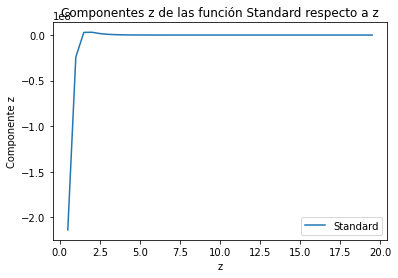

In [13]:
#plt.plot(z, PDM_RAR_ComponenteZ(1, 1, 1, R, z), label='RAR')
#plt.plot(z, PDM_Simple_ComponenteZ(1, 1, 1, R, z), label='Simple')
plt.plot(z, PDM_Standard_ComponenteZ(1, 1, 1, R, z), label='Standard')
plt.xlabel('z')
plt.ylabel('Componente z')
plt.title('Componentes z de las función Standard respecto a z')
plt.legend()

<IPython.core.display.Javascript object>


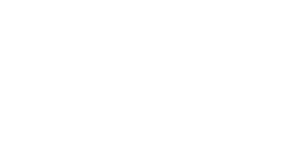

/tmp/ipykernel_7852/3035639710.py:8: RuntimeWarning: divide by zero encountered in divide
  mu_RAR = 1.0 / (1.0 - np.exp( -np.sqrt(a / a_0) ) )
/tmp/ipykernel_7852/3035639710.py:18: RuntimeWarning: invalid value encountered in multiply
  PDM_RAR_ComponenteR = factor_comun * (2.0 * R * R - c - np.sqrt(y)) * a_R / x


Text(0.5, 0, 'PDM(R,z)')

In [14]:
#plt.plot(R, z, PDM_RAR(1, 1, 1, R, z))
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot(R, z, PDM_RAR(1, 1, 1, R, z))
ax.set_xlabel('R')
ax.set_ylabel('z')
ax.set_zlabel('PDM(R,z)')

<IPython.core.display.Javascript object>


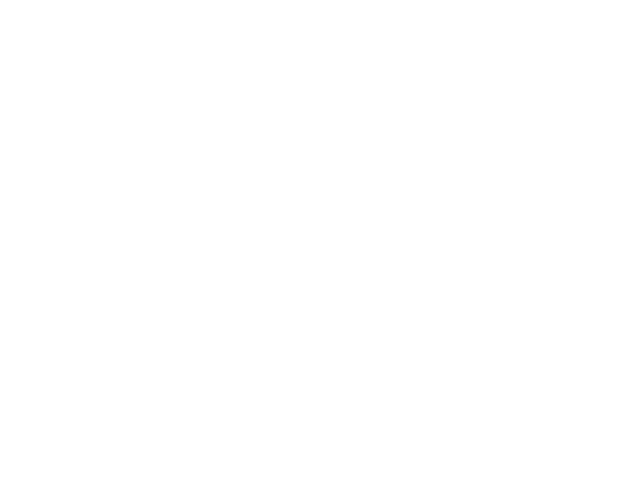

/tmp/ipykernel_7852/3035639710.py:52: RuntimeWarning: divide by zero encountered in divide
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:52: RuntimeWarning: invalid value encountered in multiply
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:62: RuntimeWarning: divide by zero encountered in divide
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:62: RuntimeWarning: invalid value encountered in multiply
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))


Text(0.5, 0, 'PDM(R,z)')

In [15]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot(R, z, PDM_Simple(1, 1, 1, R, z))
ax.set_xlabel('R')
ax.set_ylabel('z')
ax.set_zlabel('PDM(R,z)')

<IPython.core.display.Javascript object>


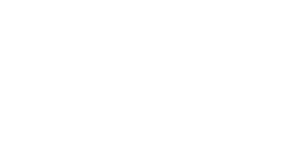

/tmp/ipykernel_7852/3035639710.py:78: RuntimeWarning: divide by zero encountered in divide
  mu_Standard = np.sqrt(0.5 * (1.0 + np.sqrt(1.0 + 4.0*a_0/a)))
/tmp/ipykernel_7852/3035639710.py:87: RuntimeWarning: invalid value encountered in multiply
  factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0/(a*a)) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:87: RuntimeWarning: divide by zero encountered in divide
  factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0/(a*a)) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:97: RuntimeWarning: invalid value encountered in multiply
  factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0/(a*a)) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:97: RuntimeWarning: divide by zero encountered in divide
  factor_comun = 2.0 * a_0 * G * M / (mu_Standard(M, b, c, R, z) * a * np.sqrt(1 + 4*a_0*a_0/(a*a)) * np.sqrt(x*x*x))


Text(0.5, 0, 'PDM(R,z)')

In [16]:
#plt.plot(R, z, PDM_RAR(1, 1, 1, R, z))
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot(R, z, PDM_Standard(1, 1, 1, R, z))
ax.set_xlabel('R')
ax.set_ylabel('z')
ax.set_zlabel('PDM(R,z)')

<IPython.core.display.Javascript object>


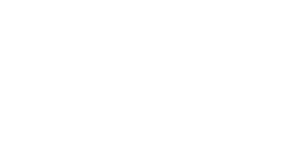

/tmp/ipykernel_7852/3035639710.py:8: RuntimeWarning: divide by zero encountered in divide
  mu_RAR = 1.0 / (1.0 - np.exp( -np.sqrt(a / a_0) ) )
/tmp/ipykernel_7852/3035639710.py:18: RuntimeWarning: invalid value encountered in multiply
  PDM_RAR_ComponenteR = factor_comun * (2.0 * R * R - c - np.sqrt(y)) * a_R / x
/tmp/ipykernel_7852/3035639710.py:52: RuntimeWarning: divide by zero encountered in divide
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:52: RuntimeWarning: invalid value encountered in multiply
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:62: RuntimeWarning: divide by zero encountered in divide
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:62: RuntimeWarning: invalid value encountered in multiply
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*

In [17]:
#plt.plot(R, z, PDM_RAR(1, 1, 1, R, z))
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot(R, z, PDM_RAR(1, 1, 1, R, z), label='RAR')
ax.plot(R, z, PDM_Simple(1, 1, 1, R, z), label='Simple')
ax.plot(R, z, PDM_Standard(1, 1, 1, R, z), label='Standard')
ax.set_xlabel('R')
ax.set_ylabel('z')
ax.set_zlabel('PDM(R,z)')
ax.legend()

<IPython.core.display.Javascript object>


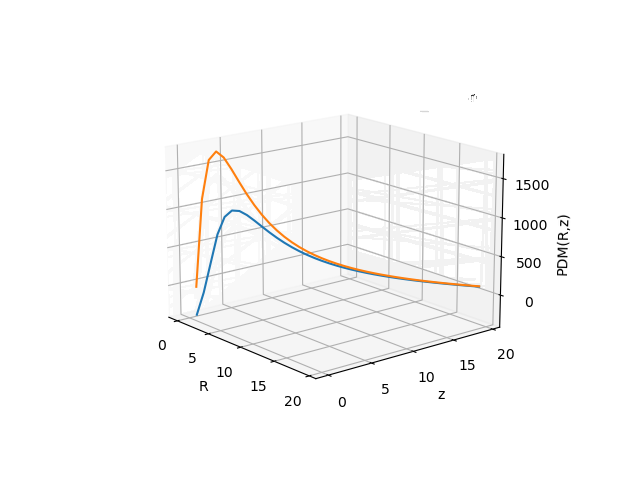

/tmp/ipykernel_7852/3035639710.py:8: RuntimeWarning: divide by zero encountered in divide
  mu_RAR = 1.0 / (1.0 - np.exp( -np.sqrt(a / a_0) ) )
/tmp/ipykernel_7852/3035639710.py:18: RuntimeWarning: invalid value encountered in multiply
  PDM_RAR_ComponenteR = factor_comun * (2.0 * R * R - c - np.sqrt(y)) * a_R / x
/tmp/ipykernel_7852/3035639710.py:52: RuntimeWarning: divide by zero encountered in divide
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:52: RuntimeWarning: invalid value encountered in multiply
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:62: RuntimeWarning: divide by zero encountered in divide
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*x*x))
/tmp/ipykernel_7852/3035639710.py:62: RuntimeWarning: invalid value encountered in multiply
  factor_comun = a_0 * G * M / (a*a * np.sqrt(1.0 + 4.0*a_0/a) * np.sqrt(x*

In [18]:
#plt.plot(R, z, PDM_RAR(1, 1, 1, R, z))

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot(R, z, PDM_RAR(1, 1, 1, R, z), label='RAR')
ax.plot(R, z, PDM_Simple(1, 1, 1, R, z), label='Simple')
#ax.plot(R, z, PDM_Standard(1, 1, 1, R, z), label='Standard')
ax.set_xlabel('R')
ax.set_ylabel('z')
ax.set_zlabel('PDM(R,z)')
ax.legend()